In [1]:
import numpy as np
import pandas as pd
import re

In [36]:
tsunami_Sources = pd.read_csv('../input/sources.csv', sep=",", header=0, index_col=0)
tsunami_Sources.head(10)

,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,REGION_CODE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
SOURCE_ID,,,,,,,,,,,,,,,,,,,,,
1,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
3,-1610,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,50.0,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
4,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,-1300,NaN,NaN,NaN,NaN,0.0,2.0,NaN,6.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-760,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-590,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-525,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3469,-480,9.0,29.0,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-479,NaN,NaN,NaN,NaN,1.0,2.0,NaN,7.0,50.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tsunami_Sources.shape

(2582, 44)

In [4]:
null_cols = tsunami_Sources.isnull().sum()
null_cols[null_cols > 0]

MONTH                          139
DAY                            241
HOUR                          1263
MINUTE                        1349
CAUSE                            6
VALIDITY                         2
FOCAL_DEPTH                   1715
PRIMARY_MAGNITUDE             1123
REGION_CODE                      1
COUNTRY                          1
STATE/PROVINCE                2289
LOCATION                        12
LATITUDE                       359
LONGITUDE                      360
MAXIMUM_HEIGHT                1540
MAGNITUDE_ABE                 2582
MAGNITUDE_IIDA                1841
INTENSITY_SOLOVIEV            1358
WARNING_STATUS                2531
MISSING                       2526
MISSING_ESTIMATE              2514
INJURIES                      2578
INJURY_ESTIMATE               2578
FATALITIES                    2346
FATALITY_ESTIMATE             2258
DAMAGE_MILLIONS_DOLLARS       2542
DAMAGE_ESTIMATE               2042
HOUSES_DAMAGED                2570
HOUSE_DAMAGE_ESTIMAT

In [5]:
tsunami_Sources.columns

Index(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'CAUSE', 'VALIDITY',
       'FOCAL_DEPTH', 'PRIMARY_MAGNITUDE', 'REGION_CODE', 'COUNTRY',
       'STATE/PROVINCE', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'MAXIMUM_HEIGHT',
       'MAGNITUDE_ABE', 'MAGNITUDE_IIDA', 'INTENSITY_SOLOVIEV',
       'WARNING_STATUS', 'MISSING', 'MISSING_ESTIMATE', 'INJURIES',
       'INJURY_ESTIMATE', 'FATALITIES', 'FATALITY_ESTIMATE',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_ESTIMATE', 'HOUSES_DAMAGED',
       'HOUSE_DAMAGE_ESTIMATE', 'HOUSES_DESTROYED',
       'HOUSE_DESTRUCTION_ESTIMATE', 'ALL_MISSING', 'MISSING_TOTAL',
       'ALL_INJURIES', 'INJURY_TOTAL', 'ALL_FATALITIES', 'FATALITY_TOTAL',
       'ALL_DAMAGE_MILLIONS', 'DAMAGE_TOTAL', 'ALL_HOUSES_DAMAGED',
       'HOUSE_DAMAGE_TOTAL', 'ALL_HOUSES_DESTROYED',
       'HOUSE_DESTRUCTION_TOTAL'],
      dtype='object')

In [38]:
tsunami_Sources = tsunami_Sources.drop(['HOUR','MINUTE','FOCAL_DEPTH','STATE/PROVINCE','MAGNITUDE_ABE',
                                        'MAGNITUDE_IIDA','WARNING_STATUS','MISSING','MISSING_ESTIMATE','INJURIES',
                                        'INJURY_ESTIMATE','DAMAGE_MILLIONS_DOLLARS','HOUSES_DAMAGED','HOUSE_DAMAGE_ESTIMATE',
                                        'HOUSES_DESTROYED','HOUSE_DAMAGE_ESTIMATE','ALL_MISSING','MISSING_TOTAL','ALL_INJURIES',
                                        'INJURY_TOTAL','ALL_HOUSES_DAMAGED','HOUSE_DAMAGE_TOTAL','ALL_HOUSES_DESTROYED',
                                        'HOUSE_DESTRUCTION_TOTAL'], 1)

tsunami_Sources

,YEAR,MONTH,DAY,CAUSE,VALIDITY,PRIMARY_MAGNITUDE,REGION_CODE,COUNTRY,LOCATION,LATITUDE,...,MAXIMUM_HEIGHT,INTENSITY_SOLOVIEV,FATALITIES,FATALITY_ESTIMATE,DAMAGE_ESTIMATE,HOUSE_DESTRUCTION_ESTIMATE,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL
SOURCE_ID,,,,,,,,,,,,,,,,,,,,,
1,-2000,NaN,NaN,1.0,1.0,NaN,50.0,SYRIA,SYRIAN COASTS,35.683,...,NaN,6.0,NaN,3.0,4.0,NaN,NaN,3.0,NaN,4.0
3,-1610,NaN,NaN,6.0,4.0,NaN,50.0,GREECE,THERA ISLAND (SANTORINI),36.400,...,90.00,6.0,NaN,3.0,3.0,NaN,NaN,3.0,NaN,3.0
4,-1365,NaN,NaN,1.0,1.0,NaN,50.0,SYRIA,SYRIAN COASTS,35.683,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5,-1300,NaN,NaN,0.0,2.0,6.0,50.0,TURKEY,"IONIAN COASTS, TROAD",39.960,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-760,NaN,NaN,0.0,2.0,NaN,50.0,ISRAEL,ISRAEL AND LEBANON COASTS,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-590,NaN,NaN,1.0,2.0,NaN,50.0,LEBANON,LEBANON COASTS,33.270,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-525,NaN,NaN,1.0,2.0,NaN,50.0,LEBANON,LEBANON COASTS,33.560,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3469,-480,9.0,29.0,1.0,1.0,NaN,50.0,GREECE,SARONIC GULF,37.900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-479,NaN,NaN,1.0,2.0,7.0,50.0,GREECE,NORTH AEGEAN,39.700,...,NaN,3.0,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN


In [34]:
print(tsunami_Sources['REGION_CODE'] == 50.0)
mar_mediterraneo = []
[mar_mediterraneo.append(code) for code in tsunami_Sources['REGION_CODE'] if code == 50.0]
print(mar_mediterraneo)
len(mar_mediterraneo)

SOURCE_ID
1        True
3        True
4        True
5        True
6        True
        ...  
5632    False
5636    False
5637    False
5639    False
5642    False
Name: REGION_CODE, Length: 2582, dtype: bool
[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0

473

In [39]:
#https://www.ngdc.noaa.gov/nndc/DescribeField.jsp?dataset=101650&search_look=77&field_name=tsevent_vsqp.REGION_CODE --> codigos por regiones
#https://www.ngdc.noaa.gov/nndc/DescribeField.jsp?dataset=101650&search_look=77&field_name=tsevent_vsqp.CAUSE_CODE --> codigo por causa

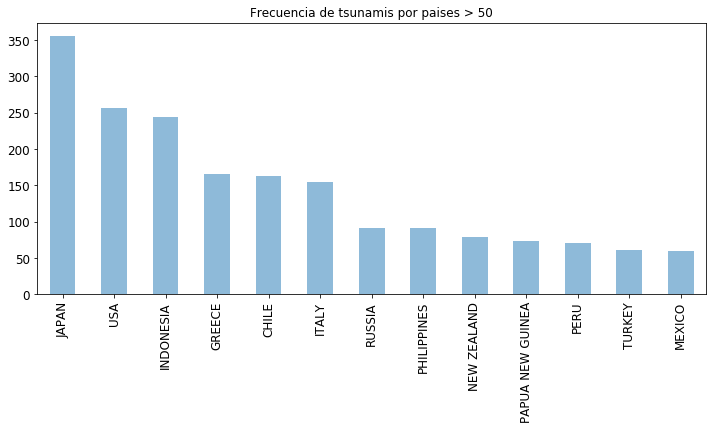

In [40]:
tsunami_Sources['COUNTRY_FRECUENCY'] = tsunami_Sources.groupby(tsunami_Sources.COUNTRY)['COUNTRY'].transform('count')
tsunami_Sources.COUNTRY[tsunami_Sources.COUNTRY_FRECUENCY > 50].value_counts().plot(kind='bar', legend=False, figsize=(12,5), 
                                            title="Frecuencia de tsunamis por paises > 50", fontsize=12, alpha=0.5); 

In [9]:
Year = []
[Year.append(i) for i in tsunami_Sources['YEAR'] if i > 2000]

print(Year)
print(len(Year))

[2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 201

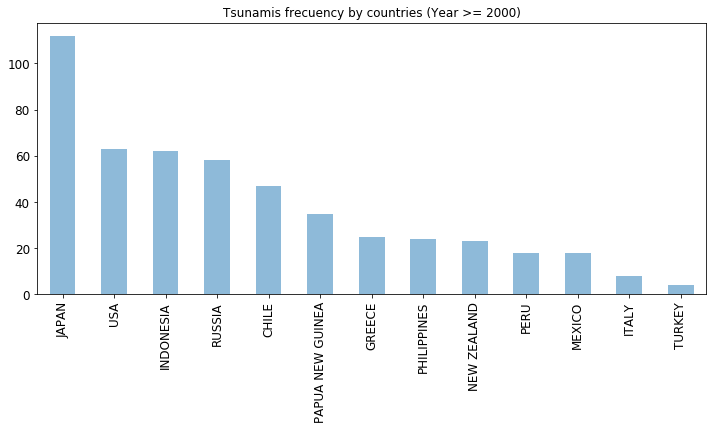

In [10]:
tsunami_Sources.COUNTRY[(tsunami_Sources.YEAR >= 1950) & (tsunami_Sources.COUNTRY_FRECUENCY > 50)].value_counts().plot(kind='bar',
                legend=False, figsize=(12,5), title="Tsunamis frecuency by countries (Year >= 2000)", fontsize=12, alpha=0.5); 

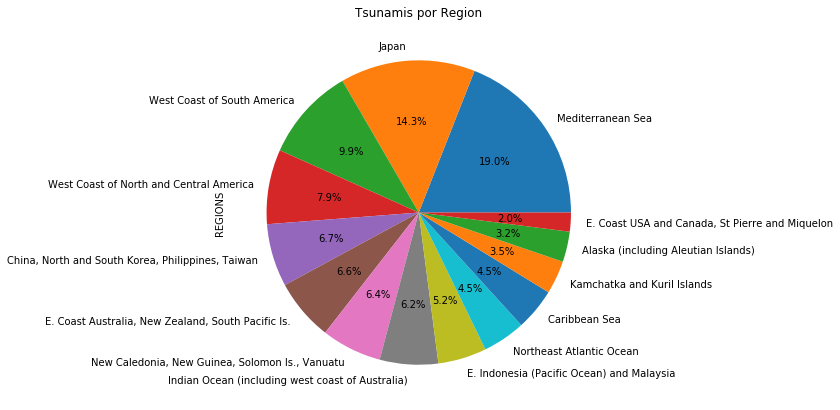

In [49]:
regions = {77:'Costa Oeste de Africa', 78:'Central Africa', 73:'Northeast Atlantic Ocean', 72:'Northwest Atlantic Ocean',
           70:'Southeast Atlantic Ocean', 71:'Southwest Atlantic Ocean', 75:'E. Coast USA and Canada, St Pierre and Miquelon',
           76:'Gulf of Mexico', 74:'Caribbean Sea', 40:'Black Sea and Caspian Sea', 50:'Mediterranean Sea', 30:'Red Sea and Persian Gulf',
           60:'Indian Ocean (including west coast of Australia)', 87:'Alaska (including Aleutian Islands)',
           84:'China, North and South Korea, Philippines, Taiwan', 81:'E. Coast Australia, New Zealand, South Pacific Is.', 
           80:'Hawaii, Johnston Atoll, Midway I', 83:'E. Indonesia (Pacific Ocean) and Malaysia', 
           82:'New Caledonia, New Guinea, Solomon Is., Vanuatu', 86:'Kamchatka and Kuril Islands', 85:'Japan',
           88:'West Coast of North and Central America', 89:'West Coast of South America'}

tsunami_Sources['REGIONS'] = tsunami_Sources['REGION_CODE'].map(regions)


tsunami_Sources['REGIONS_FRECUENCY'] = tsunami_Sources.groupby(tsunami_Sources.REGIONS)['REGIONS'].transform('count') #grupo por regiones


tsunami_Sources.REGIONS[tsunami_Sources.REGIONS_FRECUENCY >= 50].value_counts().plot(kind='pie', legend=False, figsize=(8,7),
                                                            title="Tsunamis por Region", autopct='%.1f%%');                                              

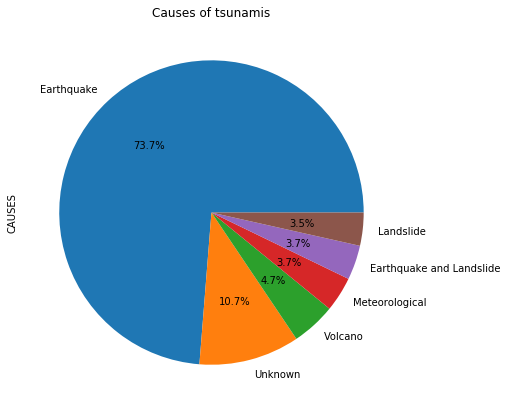

In [43]:
causes = {0:'Unknown', 1:'Earthquake', 2:'Questionable Earthquake', 3:'Earthquake and Landslide', 4:'Volcano and Earthquake',
          5:'Volcano, Earthquake, and Landslide', 6:'Volcano', 7:'Volcano and Landslide', 8:'Landslide', 9:'Meteorological',
          10:'Explosion', 11:'Astronomical Tide'}
          
tsunami_Sources['CAUSES'] = tsunami_Sources['CAUSE'].map(causes)


tsunami_Sources['CAUSES_FRECUENCY'] = tsunami_Sources.groupby(tsunami_Sources.CAUSES)['CAUSES'].transform('count')#grupo por causas
tsunami_Sources.CAUSES[tsunami_Sources.CAUSES_FRECUENCY >= 50].value_counts().plot(kind='pie', legend=False, figsize=(8,7),
                                                            title="Causes of tsunamis", autopct='%.1f%%'); # causa del tsunami
                                            
                                            
                                            
                                            

In [11]:
tsunami = pd.read_csv('../input/waves.csv', sep=",", header=0, index_col=0)
tsunami.head(20)

,WAVE_ID,YEAR,MONTH,DAY,REGION_CODE,COUNTRY,STATE/PROVINCE,LOCATION,LATITUDE,LONGITUDE,...,INJURIES,INJURY_ESTIMATE,FATALITIES,FATALITY_ESTIMATE,DAMAGE_MILLIONS_DOLLARS,DAMAGE_ESTIMATE,HOUSES_DAMAGED,HOUSE_DAMAGE_ESTIMATE,HOUSES_DESTROYED,HOUSE_DESTRUCTION_ESTIMATE
SOURCE_ID,,,,,,,,,,,,,,,,,,,,,
1,11014,-2000,NaN,NaN,50.0,SYRIA,NaN,UGARIT,35.5830,35.7500,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
3,17601,-1610,NaN,NaN,50.0,SYRIA,NaN,UGARIT,35.5830,35.7500,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
3,1,-1610,NaN,NaN,50.0,GREECE,NaN,N. AND E. COAST CRETE,35.5000,25.0000,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
9,2,-479,NaN,NaN,50.0,GREECE,NaN,"POTIDAEA, MACEDONIA",40.3000,23.3300,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
10,19364,-426,6.0,NaN,50.0,GREECE,NaN,TARFI,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,19365,-426,6.0,NaN,50.0,GREECE,NaN,THERMOPLYLES,38.8000,22.5500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,5,-426,6.0,NaN,50.0,GREECE,NaN,DAPHNUS,38.0000,23.6800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,6,-426,6.0,NaN,50.0,GREECE,NaN,SKOPELOS,39.1200,23.7200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,3,-426,6.0,NaN,50.0,GREECE,NaN,ATALANTI,38.6510,22.9990,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [12]:
tsunami.shape

(26203, 29)

In [13]:
null_cols = tsunami.isnull().sum()
null_cols[null_cols > 0]

MONTH                           104
DAY                             213
REGION_CODE                       1
COUNTRY                           3
STATE/PROVINCE                 5197
LOCATION                          5
LATITUDE                        612
LONGITUDE                       612
DISTANCE_FROM_SOURCE            883
TRAVEL_TIME_HOURS             22931
TRAVEL_TIME_MINUTES           22956
VALIDITY                      25876
MEASUREMENT_TYPE                289
PERIOD                        23977
FIRST_MOTION                  24652
MAXIMUM_HEIGHT                 3874
HORIZONTAL_INUNDATION         17412
INJURIES                      26080
INJURY_ESTIMATE               26074
FATALITIES                    25520
FATALITY_ESTIMATE             25299
DAMAGE_MILLIONS_DOLLARS       26068
DAMAGE_ESTIMATE               24316
HOUSES_DAMAGED                26041
HOUSE_DAMAGE_ESTIMATE         25801
HOUSES_DESTROYED              25911
HOUSE_DESTRUCTION_ESTIMATE    25445
dtype: int64

In [14]:
tsunami = tsunami.drop(['TRAVEL_TIME_HOURS','TRAVEL_TIME_MINUTES','VALIDITY','FIRST_MOTION','INJURIES',
                       'INJURY_ESTIMATE','FATALITIES','FATALITY_ESTIMATE','DAMAGE_MILLIONS_DOLLARS',
                       'DAMAGE_ESTIMATE','HOUSES_DAMAGED','HOUSE_DAMAGE_ESTIMATE','HOUSES_DESTROYED',
                       'HOUSE_DAMAGE_ESTIMATE'], 1)


In [15]:
tsunami.shape

(26203, 16)

In [16]:
tsunami.head(10)

,WAVE_ID,YEAR,MONTH,DAY,REGION_CODE,COUNTRY,STATE/PROVINCE,LOCATION,LATITUDE,LONGITUDE,DISTANCE_FROM_SOURCE,MEASUREMENT_TYPE,PERIOD,MAXIMUM_HEIGHT,HORIZONTAL_INUNDATION,HOUSE_DESTRUCTION_ESTIMATE
SOURCE_ID,,,,,,,,,,,,,,,,
1,11014,-2000,NaN,NaN,50.0,SYRIA,NaN,UGARIT,35.583,35.750,12.0,1.0,NaN,NaN,NaN,NaN
3,17601,-1610,NaN,NaN,50.0,SYRIA,NaN,UGARIT,35.583,35.750,935.0,1.0,NaN,NaN,NaN,NaN
3,1,-1610,NaN,NaN,50.0,GREECE,NaN,N. AND E. COAST CRETE,35.500,25.000,106.0,1.0,NaN,NaN,NaN,NaN
9,2,-479,NaN,NaN,50.0,GREECE,NaN,"POTIDAEA, MACEDONIA",40.300,23.330,67.0,1.0,NaN,NaN,NaN,NaN
10,19364,-426,6.0,NaN,50.0,GREECE,NaN,TARFI,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
10,19365,-426,6.0,NaN,50.0,GREECE,NaN,THERMOPLYLES,38.800,22.550,17.0,1.0,NaN,NaN,NaN,NaN
10,5,-426,6.0,NaN,50.0,GREECE,NaN,DAPHNUS,38.000,23.680,132.0,1.0,NaN,NaN,NaN,NaN
10,6,-426,6.0,NaN,50.0,GREECE,NaN,SKOPELOS,39.120,23.720,91.0,1.0,NaN,NaN,NaN,NaN
10,3,-426,6.0,NaN,50.0,GREECE,NaN,ATALANTI,38.651,22.999,38.0,1.0,NaN,NaN,NaN,NaN


In [17]:
list(tsunami.columns)

['WAVE_ID',
 'YEAR',
 'MONTH',
 'DAY',
 'REGION_CODE',
 'COUNTRY',
 'STATE/PROVINCE',
 'LOCATION',
 'LATITUDE',
 'LONGITUDE',
 'DISTANCE_FROM_SOURCE',
 'MEASUREMENT_TYPE',
 'PERIOD',
 'MAXIMUM_HEIGHT',
 'HORIZONTAL_INUNDATION',
 'HOUSE_DESTRUCTION_ESTIMATE']

In [18]:
list(tsunami_Sources.columns)

['YEAR',
 'MONTH',
 'DAY',
 'VALIDITY',
 'PRIMARY_MAGNITUDE',
 'REGION_CODE',
 'COUNTRY',
 'LOCATION',
 'LATITUDE',
 'LONGITUDE',
 'MAXIMUM_HEIGHT',
 'INTENSITY_SOLOVIEV',
 'FATALITIES',
 'FATALITY_ESTIMATE',
 'DAMAGE_ESTIMATE',
 'HOUSE_DESTRUCTION_ESTIMATE',
 'ALL_FATALITIES',
 'FATALITY_TOTAL',
 'ALL_DAMAGE_MILLIONS',
 'DAMAGE_TOTAL',
 'COUNTRY_FRECUENCY']

In [19]:
tsunami_stat = pd.merge(tsunami_Sources, tsunami, on=['YEAR','MONTH','DAY','REGION_CODE','COUNTRY','LOCATION','LATITUDE',
                                                      'LONGITUDE','MAXIMUM_HEIGHT','HOUSE_DESTRUCTION_ESTIMATE'])
tsunami_stat.head(50)                                      

,YEAR,MONTH,DAY,VALIDITY,PRIMARY_MAGNITUDE,REGION_CODE,COUNTRY,LOCATION,LATITUDE,LONGITUDE,...,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,COUNTRY_FRECUENCY,WAVE_ID,STATE/PROVINCE,DISTANCE_FROM_SOURCE,MEASUREMENT_TYPE,PERIOD,HORIZONTAL_INUNDATION
0,859,NaN,NaN,2.0,NaN,50.0,TURKEY,SAMANDAGI,36.080,36.250,...,NaN,NaN,NaN,61.0,10877,NaN,0.0,1.0,NaN,NaN
1,975,10.0,26.0,2.0,NaN,50.0,TURKEY,"MARMARA SEA, STRAIT OF BOSPORUS",41.040,28.980,...,NaN,NaN,NaN,61.0,10879,NaN,0.0,1.0,NaN,NaN
2,1172,NaN,NaN,3.0,NaN,50.0,ITALY,ISLAND OF SICILY,38.000,15.000,...,3.0,NaN,NaN,154.0,10900,REGIONE SICILIANA,0.0,1.0,NaN,NaN
3,1534,NaN,NaN,2.0,NaN,50.0,ISRAEL,PALESTINE,NaN,NaN,...,NaN,NaN,NaN,9.0,10925,NaN,NaN,1.0,NaN,NaN
4,1612,11.0,8.0,4.0,6.7,50.0,GREECE,ISLAND OF CRETE,35.500,25.500,...,NaN,NaN,NaN,166.0,145,NaN,0.0,1.0,NaN,NaN
5,1672,4.0,NaN,1.0,6.5,50.0,GREECE,ISLAND OF TENEDOS,40.000,26.000,...,NaN,NaN,NaN,166.0,197,NaN,0.0,1.0,NaN,NaN
6,1714,8.0,4.0,0.0,NaN,60.0,MYANMAR (BURMA),AVA (INNWA),21.850,95.967,...,NaN,NaN,NaN,3.0,17514,NaN,0.0,1.0,NaN,NaN
7,1716,NaN,NaN,-1.0,NaN,85.0,JAPAN,OSHIMA ISLAND,34.730,139.400,...,NaN,NaN,NaN,356.0,28230,TOKYO,0.0,1.0,NaN,NaN
8,1721,3.0,24.0,1.0,NaN,50.0,SPAIN,BALEARIC ISLANDS,NaN,NaN,...,NaN,NaN,NaN,11.0,10989,NaN,NaN,1.0,NaN,NaN
9,1726,NaN,NaN,2.0,NaN,74.0,VENEZUELA,PENINSULA DE ARAYA,10.633,-64.300,...,NaN,NaN,NaN,26.0,308,NaN,0.0,1.0,NaN,NaN


In [20]:
tsunami_stat.shape

(50, 27)